In [1]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 503 kB 74.4 MB/s 
     |████████████████████████████████| 3.8 MB 47.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=85385e3bdb0b9952247966d2f0205bc430bd20707f9abb8f4153ae7a07e5f323
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [2]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.7 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [3]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.9 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=fb27a4a5150c7115903933bda431b5e7f5c6f04a1bfb613514f873f274897330
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [4]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3112960/45929032 bytes (6.8%)7266304/45929032 bytes (15.8%)11501568/45929032 bytes (25.0%)15532032/45929032 bytes (33.8%)19660800/45929032 bytes (42.8%)23740416/45929032 bytes (51.7%)27770880/45929032 bytes (60.5%)31236096/45929032 bytes (68.0%)34447360/45929032 bytes (75.0%)37593088/45929032 bytes (81.9%)41730048/45929032 bytes (90.9%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [6]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'



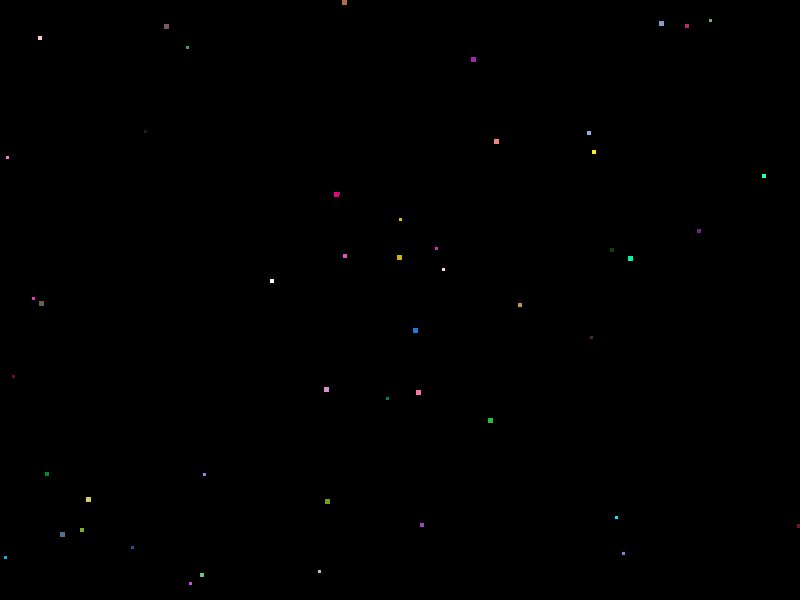

In [10]:
# Let's render something!
import random
def ownVertex(x,y):
  #print(x,y)
  gl.glVertex2f(x/(WIDTH/2), y/(HEIGHT/2))
def colorChange(x,y,z):
  gl.glColor3f(x/255,y/255,z/255)
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


for i in range(50):
  gl.glPointSize(random.randint(3,5))
  gl.glBegin(gl.GL_POINTS)
  x = random.randint(0,255)
  y = random.randint(0,255)
  z = random.randint(0,255)
  colorChange(x,y,z)
  ownVertex(random.randint(-(WIDTH/2),(WIDTH/2)),random.randint(-(HEIGHT/2),(HEIGHT/2)))
  gl.glEnd()

# gl.glColor3f(0, 255, 0)
# gl.glPointSize(5)
# gl.glBegin(gl.GL_LINES)
# ownVertex(0,HEIGHT/2)
# ownVertex(0,-HEIGHT/2)
# gl.glEnd()
# gl.glColor3f(0, 255, 0)
# gl.glBegin(gl.GL_LINES)
# ownVertex(WIDTH/2,0)
# ownVertex(-WIDTH/2,0)
# gl.glEnd()


img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(255, 255, 255)
gl.glPointSize(8)
gl.glBegin(gl.GL_LINES)
for i in range(-400,400,1):
  ownVertex(i,(HEIGHT/2))
  ownVertex(i,(-HEIGHT/2))
  ownVertex(WIDTH/2,i)
  ownVertex(-WIDTH/2,i)
gl.glEnd()

colorChange(0,0,0)


gl.glBegin(gl.GL_LINES)
#triangle
ownVertex(((HEIGHT/4)+50),0)
ownVertex((-(HEIGHT/4)-50),0)
ownVertex(((HEIGHT/4)+50),0)
ownVertex(0,(HEIGHT/4))
ownVertex((-(HEIGHT/4)-50),0)
ownVertex(0,(HEIGHT/4))
#Quads
ownVertex(((HEIGHT/4)-20),0)
ownVertex(((HEIGHT/4)-20),-(HEIGHT/4)-50)
ownVertex((-(HEIGHT/4)+20),0)
ownVertex((-(HEIGHT/4)+20),-(HEIGHT/4)-50)
ownVertex(((HEIGHT/4)-20),-(HEIGHT/4)-50)
ownVertex((-(HEIGHT/4)+20),-(HEIGHT/4)-50)

#Door
ownVertex(-30,-((HEIGHT/4)-60))
ownVertex(30,-((HEIGHT/4)-60))

ownVertex(-30,-((HEIGHT/4)-60))
ownVertex(-30,-(HEIGHT/4)-50)
ownVertex(30,-((HEIGHT/4)-60))
ownVertex(30,-(HEIGHT/4)-50)

#Windows_Right

#UP
ownVertex(((HEIGHT/4)-40),-20)
ownVertex(40,-20)

#Down
ownVertex((40),(-((HEIGHT/4)-60)))
ownVertex(((HEIGHT/4)-40),(-((HEIGHT/4)-60)))
#Left
ownVertex(40,-20)
ownVertex((40),(-((HEIGHT/4)-60)))
#Right
ownVertex(((HEIGHT/4)-40),-20)
ownVertex(((HEIGHT/4)-40),(-((HEIGHT/4)-60)))
#knob

#Windows_Left

#UP
ownVertex(-((HEIGHT/4)-40),-20)
ownVertex(-40,-20)

#Down
ownVertex((-40),(-((HEIGHT/4)-60)))
ownVertex(-((HEIGHT/4)-40),(-((HEIGHT/4)-60)))
#Left
ownVertex(-40,-20)
ownVertex((-40),(-((HEIGHT/4)-60)))
#Right
ownVertex(-((HEIGHT/4)-40),-20)
ownVertex(-((HEIGHT/4)-40),(-((HEIGHT/4)-60)))
#knob

gl.glEnd()


gl.glColor3f(0, 0, 0)
gl.glPointSize(5)
gl.glBegin(gl.GL_POINTS)
ownVertex(20,-((HEIGHT/4)+5))
gl.glEnd()

# gl.glColor3f(0, 255, 0)
# gl.glPointSize(5)
# gl.glBegin(gl.GL_LINES)
# ownVertex(0,HEIGHT/2)
# ownVertex(0,-HEIGHT/2)
# gl.glEnd()
# gl.glColor3f(0, 255, 0)
# gl.glBegin(gl.GL_LINES)
# ownVertex(WIDTH/2,0)
# ownVertex(-WIDTH/2,0)
# gl.glEnd()


img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)